##  A 3-Hidden Layers Architecture
What is happening here?
    [1] A deep DNN model
    [2] Contains two lines of code to find the rsquare
    [3] Includes lines of code on cross validation
    [4] Include the plot of the history curves
    
The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model. However, a higher value of R square is considered desirable.

In [17]:
import pandas as pd 
import numpy as np                                             
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam
from sklearn.metrics import r2_score
import math
from matplotlib import pyplot as plt
import seaborn as sns
import shap

## Imports the data
bucklingdata = pd.read_csv("CBL_SimulationResults.csv", encoding='cp1252')
input_data = bucklingdata.drop(['Critical Buckling Load (N)','Critical Buckling Load (kN)'], axis=1)
output_data = bucklingdata['Critical Buckling Load (kN)']

## Data splitting
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data,
                                                   test_size=0.3,
                                                    shuffle=False,
                                                    stratify=None,
                                                    random_state=42)

# For validation number input and output data
val_no = round(0.2*y_train.size)
x_val = X_train[:val_no]
y_val = y_train[:val_no]

def create_model3H(hp_layer_1, hp_layer_2, hp_layer_3):
    model = Sequential()
    model.add(Input(shape=(11,)))
    hp_activation = 'relu'
    hp_learning_rate = 0.001
    model.add(Dense(hp_layer_1, activation=hp_activation))
    model.add(Dense(hp_layer_2, activation=hp_activation))
    model.add(Dense(hp_layer_3, activation=hp_activation))
    model.add(Dense(1, activation="linear"))
    # Compile your model with your optimizer, loss, and metrics
    model.compile(loss='mse',
                  optimizer=Adam(learning_rate = hp_learning_rate),
                  metrics=["mae"])
    return model

# Specify the number of neurons for the three hidden layers
p1 = 30
p2 = 40
p3 = 50

model = create_model3H(p1, p2, p3)

## Train your model for a number of epochs, with the .fit()
history = model.fit(X_train, y_train, epochs=150,
                    validation_data=(x_val, y_val),batch_size = 32,
                    verbose = 0)

## Get the performance metrics for the network and the learning curves

In [44]:
## Evaluating the model
trainmse, trainmae = model.evaluate(X_train, y_train, verbose=0)
valmse, valmae = model.evaluate(x_val, y_val, verbose=0)
testmse, testmae = model.evaluate(X_test, y_test, verbose=0)

# Capture the Rsquare data: training
train_pred = model.predict(X_train)
train_r2= r2_score(y_train, train_pred)

# Capture the Rsquare data: validation
val_pred = model.predict(x_val)
val_r2= r2_score(y_val, val_pred)

# Capture the Rsquare data: testing
test_pred = model.predict(X_test)
test_r2= r2_score(y_test, test_pred)

rsquares = pd.DataFrame(data = np.column_stack((train_r2, val_r2, test_r2)))
RMSEs = pd.DataFrame(data = np.column_stack((math.sqrt(trainmse), math.sqrt(valmse), math.sqrt(testmse))))
MAEs = pd.DataFrame(data = np.column_stack((trainmae, valmae, testmae)))

print(rsquares)
print(RMSEs)
print(MAEs)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
          0         1         2
0  0.984392  0.993379  0.878212
          0         1         2
0  0.305154  0.204079  0.398663
          0         1         2
0  0.238972  0.163601  0.319206


### loss vs the number of epochs & MAE vs the number of epochs

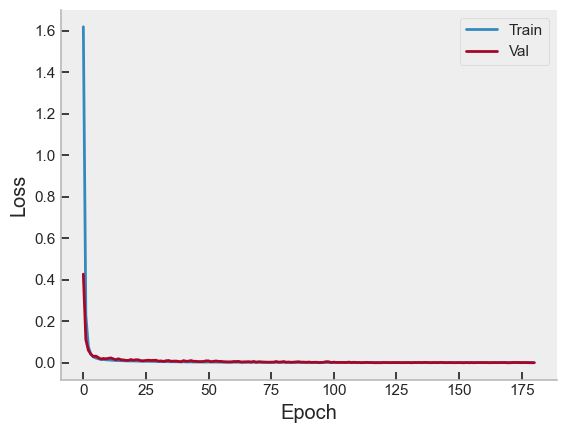

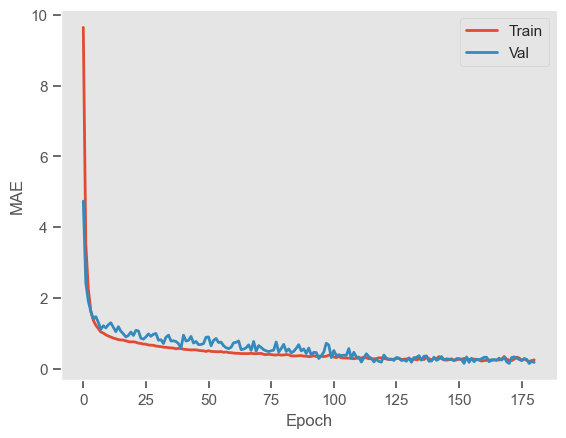

In [21]:
def plot_loss(loss,val_loss):
  plt.figure()
  plt.style.use('bmh')
  plt.grid(False)
  plt.plot(loss, linewidth=2)
  plt.plot(val_loss, linewidth=2)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.show()

def plot_mae(mae,val_mae):
  plt.figure()
  plt.style.use('ggplot')
  plt.grid(False)
  plt.plot(mae, linewidth=2)
  plt.plot(val_mae, linewidth=2)
  plt.ylabel('MAE')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.show()

train_loss = (np.array(history.history["loss"]))/100
val_loss = np.array((history.history["val_loss"]))/100

plot_loss(train_loss, val_loss)
plot_mae(history.history["mae"], history.history["val_mae"])

### Correlation between the actual output and the predicted output with the training dataset

[]

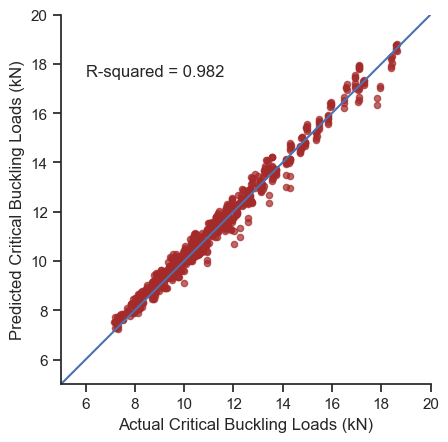

In [22]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
a = plt.axes(aspect='equal')
plt.scatter(y_train, train_pred, s = 20, alpha=0.7, c = 'brown')
plt.xlabel('Actual Critical Buckling Loads (kN)')
plt.ylabel('Predicted Critical Buckling Loads (kN)')
plt.annotate("R-squared = {:.3f}".format(r2_score(y_train, train_pred)), (6, 17.5))
plt.xlim([5, 20])
plt.ylim([5, 20])
plt.plot([5, 20], [5, 20])
plt.plot()

### Correlation between the actual output and the predicted output with the testing dataset

[]

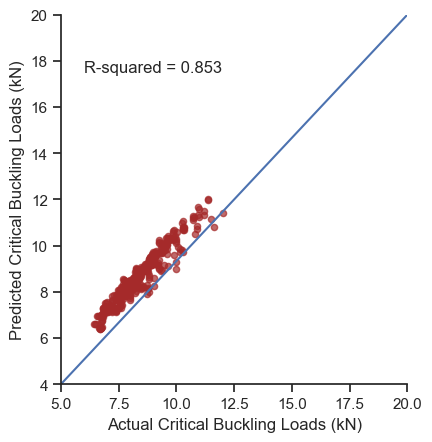

In [23]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_pred, s = 20, alpha=0.7, c = 'brown')
plt.xlabel('Actual Critical Buckling Loads (kN)')
plt.ylabel('Predicted Critical Buckling Loads (kN)')
plt.annotate("R-squared = {:.3f}".format(r2_score(y_test, test_pred)), (6, 17.5))
plt.xlim([5, 20])
plt.ylim([4, 20])
plt.plot([5, 20], [4, 20])
plt.plot()

## Variable importance SHAP plot

  0%|          | 0/389 [00:00<?, ?it/s]

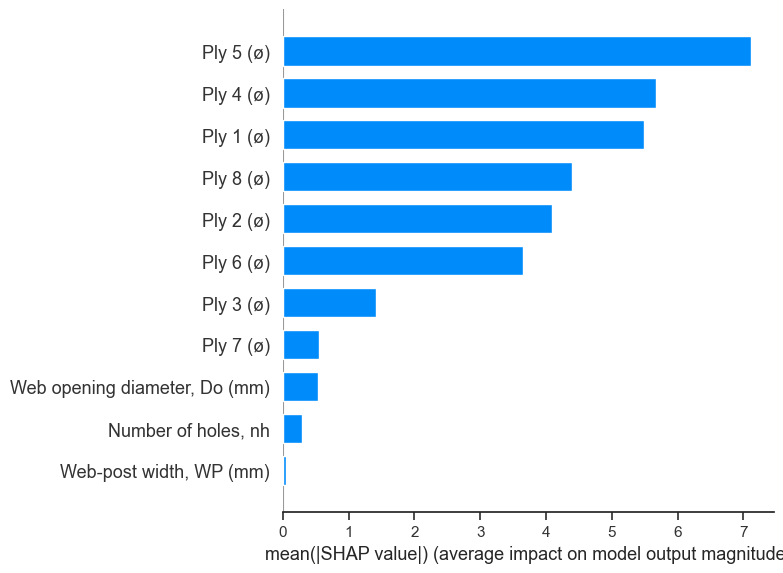

In [24]:
### VARIABLE IMPORTANCE
# See more here: https://shap-lrjball.readthedocs.io/en/latest/example_notebooks/plots/bar.html
features = ["Number of holes, nh", "Web-post width, WP (mm)",  "Web opening diameter, Do (mm)",  "Ply 1 (ø)", "Ply 2 (ø)", "Ply 3 (ø)", "Ply 4 (ø)", "Ply 5 (ø)", "Ply 6 (ø)", "Ply 7 (ø)", "Ply 8 (ø)"]

# Create a SHAP explainer using KernelExplainer
explainer = shap.KernelExplainer(model, shap.sample(X_train, 1))

# Calculate SHAP values for the test dataset
shap_values = explainer.shap_values(X_test)

# Reshape shap_values to remove the last dimension
shap_values_reshaped = shap_values.reshape(X_test.shape)  # Assuming X_test.shape is (389, 11)

# Visualize feature importances using bar plot
shap.summary_plot(shap_values_reshaped, X_test, feature_names=features, plot_type="bar")
plt.show()